# 2. Plotting of Iris data

## Context

Working through the plotting of the Iris dataset and using training/test splitting of the dataset to evluate the simple k-nearest neighbors predictive algorithm code I wrote earlier.

## Work outline

I am following the tutorial found at [this_site](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/) and walking through a simple example of predicting iris species using the well known [iris_petal_dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data).

### Steps

1. import module from local filepath; load local data file
2. plot the Iris dataset following some tutorial informed workflow


## Result

Working through getting workable scatter plots took more time and effort than I expected. Stopping the notebook after working through the plotting exercise.

## Next steps

Develop and execute functions to score the initial knn algorithm for identifying Iris species.

## 1. import module from local filepath; load local data file

Also cleanup the dataset to prepare for applying functions

In [1]:
# import necessary contents from packages
import csv
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from knn_base import euclidean_distance
from knn_base import find_k_neighbors
from knn_base import predict_category_from_knn

In [2]:
# load raw dataset
with open('data/iris_data.csv', 'r') as f:
    lines = csv.reader(f)
    dataset = list(lines)

In [3]:
# clean dataset for functions
cleaned_dataset = []
for row in dataset:
    new_row = []
    for i in range(len(row)):
        if i < 4:
            new_row.append(float(row[i]))
        else:
            new_row.append(row[i])
    cleaned_dataset.append(new_row)

## 2. plot the Iris dataset following some tutorial informed workflow

Hardest thing here is managing the sparse data labels. Because I just have the raw data I'm missing the labels for each column.

In [4]:
dataset_array = np.array(cleaned_dataset)

In [5]:
dataset_array.size

750

In [6]:
dataset_array

array([['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
       ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
       ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
       ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
       ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
       ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
       ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
       ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
       ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
       ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
       ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
       ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
       ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
       ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
       ['5.1

In [14]:
dataset_array[:,4]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [15]:
Counter(dataset_array[:,4])

Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})

In [16]:
iris_species_key = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

In [17]:
[iris_species_key[n] for n in dataset_array[:,4]]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [18]:
keyed_species_list = [iris_species_key[n] for n in dataset_array[:,4]]

In [21]:
dataset_array_with_keys = np.concatenate((dataset_array[:, :4], keyed_species_list), axis=1)

ValueError: all the input arrays must have same number of dimensions

In [23]:
dataset_array[:, :4].ndim

2

In [25]:
np.array(keyed_species_list).ndim

1

In [26]:
np.array([keyed_species_list]).ndim

2

In [27]:
keyed_species_array = np.array([keyed_species_list])

In [28]:
dataset_array_with_keys = np.concatenate((dataset_array[:, :4], keyed_species_array.T), axis=1)

In [30]:
dataset_array_with_keys.dtype

dtype('S32')

In [31]:
dataset_array_with_keys.astype(float)

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [33]:
(n, bins) = np.histogram(dataset_array_with_keys[:, 0].astype(float), bins=25, density=True)

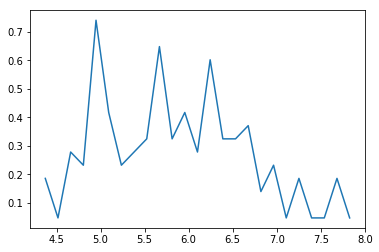

In [34]:
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()

In [35]:
plt.scatter?

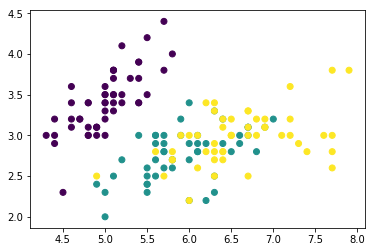

In [38]:
plt.scatter(dataset_array[:, 0].astype(float), dataset_array[:, 1].astype(float), c=dataset_array_with_keys[:, 4].astype(float))

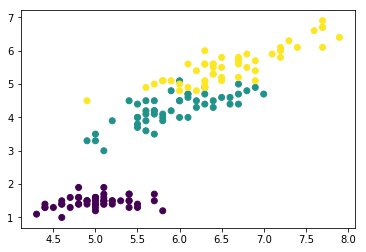

In [39]:
plt.scatter(dataset_array[:, 0].astype(float), dataset_array[:, 2].astype(float), c=dataset_array_with_keys[:, 4].astype(float))

In [40]:
data_labels = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
    'species'
]

In [41]:
iris_species_key_rev = {
    value: key for key, value in iris_species_key.iteritems()
}

In [42]:
iris_species_key_rev

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [44]:
formatter = plt.FuncFormatter(lambda i, *args: iris_species_key_rev[i])

In [46]:
formatter(0)

'Iris-setosa'

In [47]:
def iris_2x2_plt_func(indices):
    plt.scatter(
        dataset_array[:, indices[0]].astype(float),
        dataset_array[:, indices[1]].astype(float),
        c=dataset_array_with_keys[:, 4].astype(float))
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris_species_key_rev[indices[0]])
    plt.ylabel(iris_species_key_rev[indices[1]])

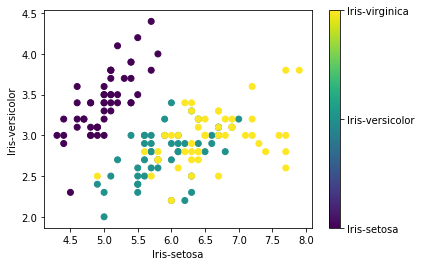

In [48]:
iris_2x2_plt_func((0,1))

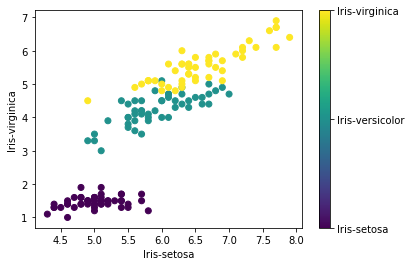

In [49]:
iris_2x2_plt_func((0,2))

In [50]:
def iris_2D_plt_func(indices):
    """Returns a well-formated 2D scatter plot for iris data
    when given pairs of indices between 0 and 3
    """
    plt.scatter(
        dataset_array[:, indices[0]].astype(float),
        dataset_array[:, indices[1]].astype(float),
        c=dataset_array_with_keys[:, 4].astype(float))
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(data_labels[indices[0]])
    plt.ylabel(data_labels[indices[1]])

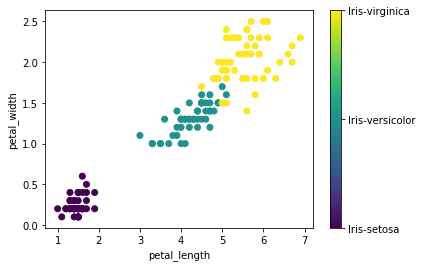

In [53]:
iris_2D_plt_func((2,3))

In [54]:
plt.subplot(2,3)
iris_2D_plt_func((0,1))
iris_2D_plt_func((0,2))
iris_2D_plt_func((0,3))
iris_2D_plt_func((1,2))
iris_2D_plt_func((1,3))
iris_2D_plt_func((2,3))

ValueError: Illegal argument(s) to subplot: (2, 3)

<Figure size 432x288 with 0 Axes>

In [55]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [56]:
fig.suptitle('plotting Iris dataset pairwise')

Text(0.5,0.98,'plotting Iris dataset pairwise')

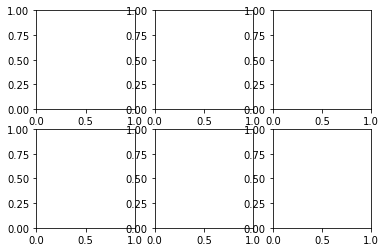

In [57]:
fig, ax_lst = plt.subplots(2, 3)

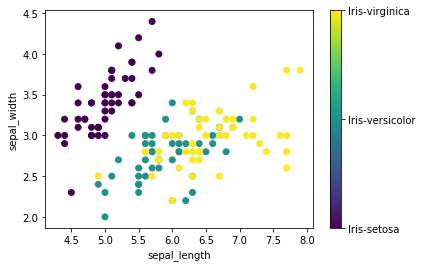

In [58]:
iris_2D_plt_func((0,1))

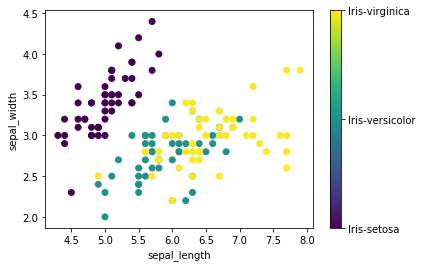

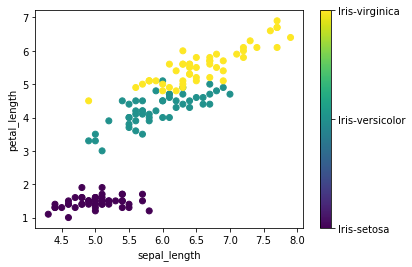

In [60]:
iris_2D_plt_func((0,1))
plt.show()
iris_2D_plt_func((0,2))
plt.show()


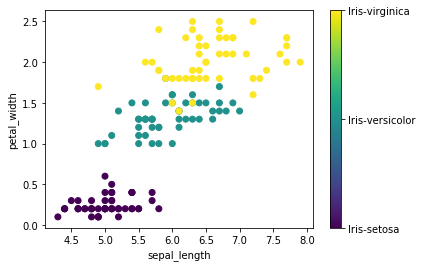

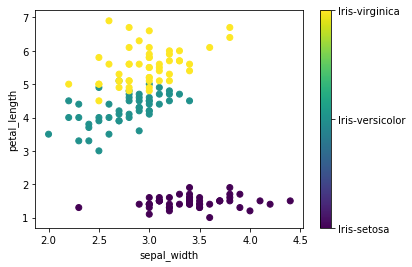

In [61]:
iris_2D_plt_func((0,3))
plt.show()
iris_2D_plt_func((1,2))
plt.show()

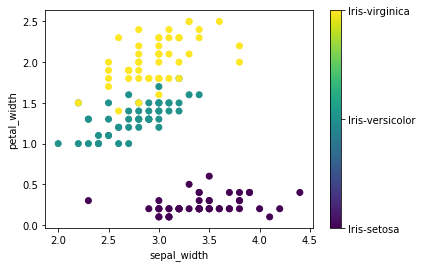

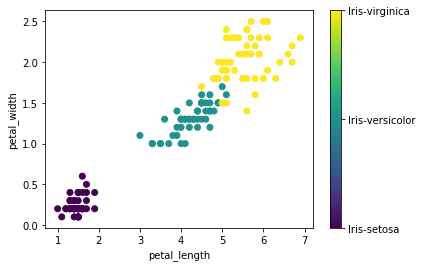

In [62]:
iris_2D_plt_func((1,3))
plt.show()
iris_2D_plt_func((2,3))
plt.show()

In [ ]:
# got all the cross-wise scatter plots generated
# calling that a win